In [1]:
import pandas as pd

# baca dataset

In [2]:
df = pd.read_csv('Grammar Correction.csv')

# Hilangkan fitur serial number

In [3]:
df = df.drop('Serial Number', axis=1)

In [4]:
df = df.rename(columns={'Ungrammatical Statement': 'input', 'Standard English': 'target', 'Error Type': 'error_type'})
df.to_csv('Grammar Correction.csv', index=False)

# Cek distribusi kelas

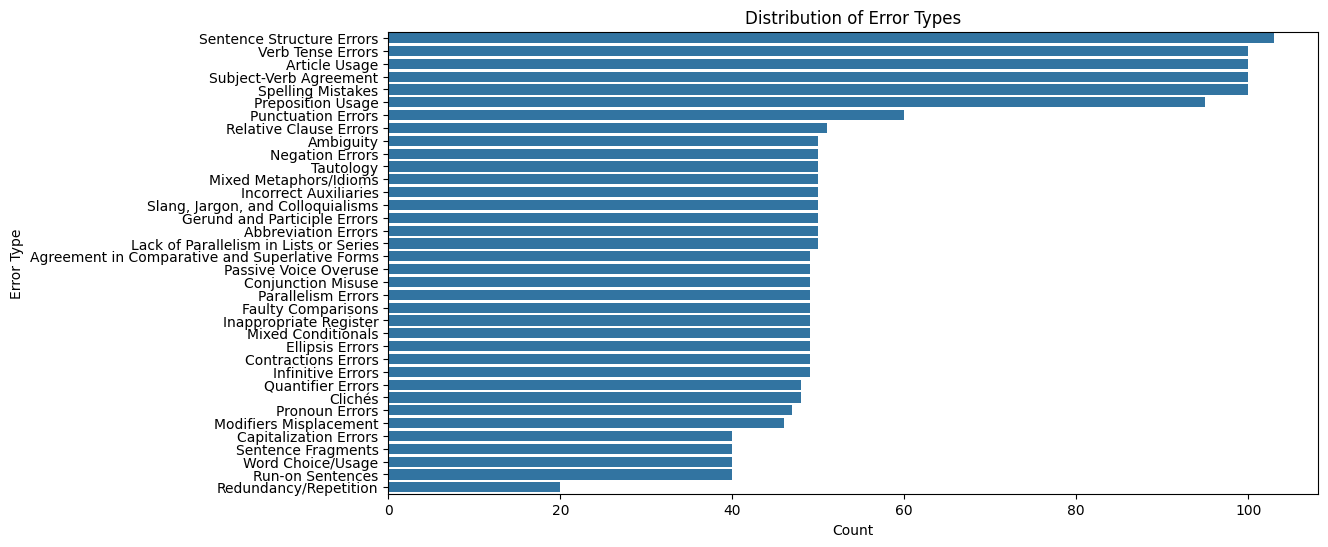

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(y='error_type', data=df, order = df['error_type'].value_counts().index)
plt.title('Distribution of Error Types')
plt.xlabel('Count')
plt.ylabel('Error Type')
plt.show()

# Seleksi kelas fitur error type yang relevan untuk speech to text

In [7]:
selected_errors = [

    'Verb Tense Errors',
    'Subject-Verb Agreement',
    'Preposition Usage',
    'Article Usage',
    'Pronoun Errors',
    'Word Choice/Usage',
    'Relative Clause Errors',
    'Incorrect Auxiliaries',
    'Gerund and Participle Errors',
    'Infinitive Errors',
    'Sentence Fragments',
    'Sentence Structure Errors',
    'Passive Voice Overuse',
    'Redundancy/Repetition',
    'Modifiers Misplacement'
]

In [8]:
filtered_df = df[df['error_type'].isin(selected_errors)]

# Cek distribusi

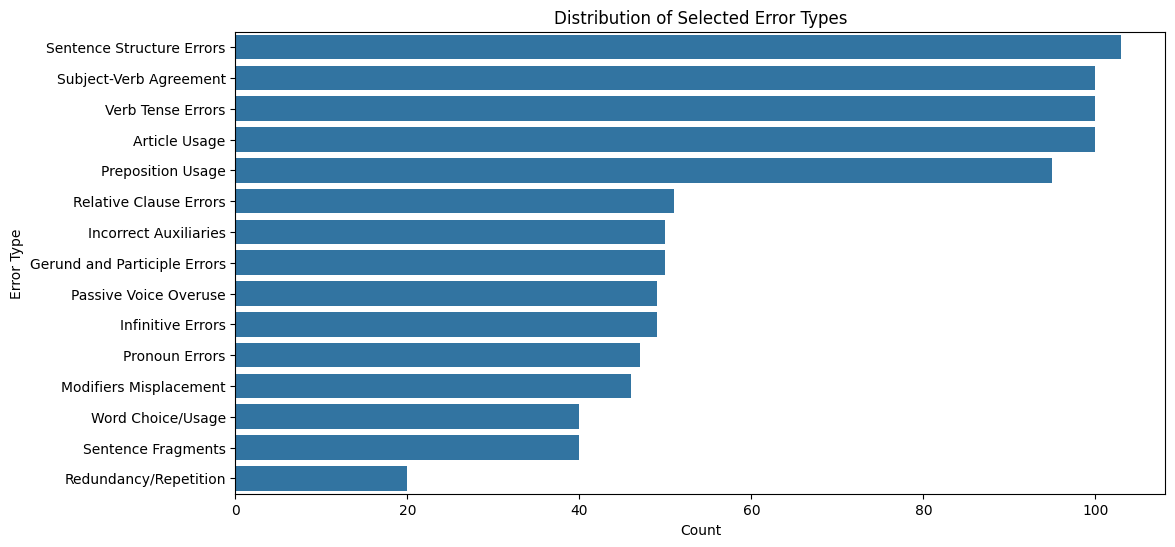

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(y='error_type', data=filtered_df, order = filtered_df['error_type'].value_counts().index)
plt.title('Distribution of Selected Error Types')
plt.xlabel('Count')
plt.ylabel('Error Type')
plt.show()

# lakukan hybrid random under dan over sampling pastikan rata

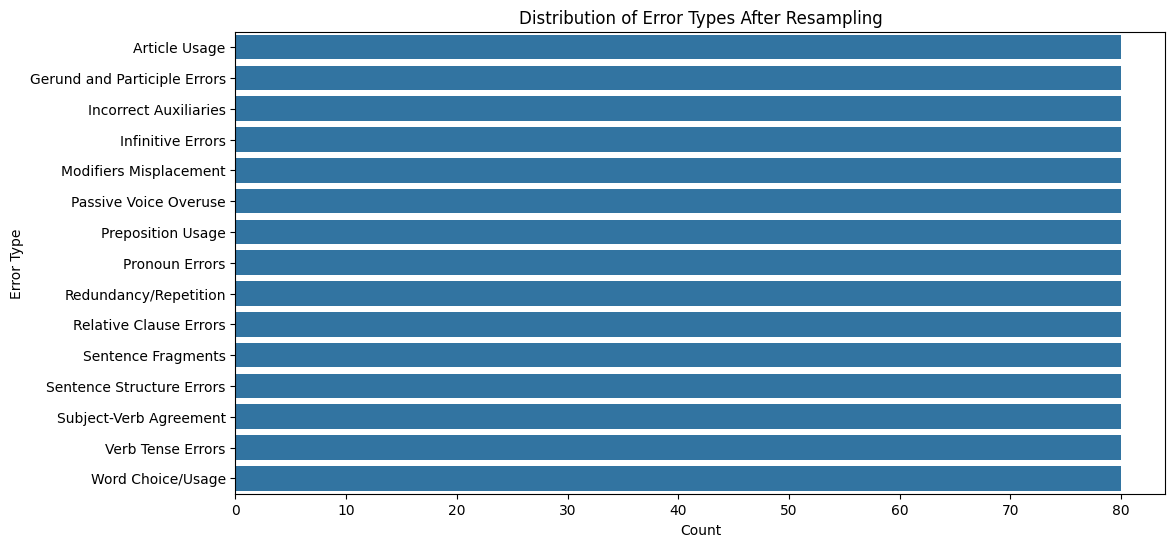

In [11]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
X = filtered_df.drop('error_type', axis=1)
y = filtered_df['error_type']

# Get the value counts of each error type
class_counts = y.value_counts()

# Determine classes to oversample and undersample
oversample_classes = class_counts[class_counts < 80].index.tolist()
undersample_classes = class_counts[class_counts > 80].index.tolist()

# Create dictionaries for sampling strategies
oversample_strategy = {cls: 80 for cls in oversample_classes}
undersample_strategy = {cls: 80 for cls in undersample_classes}

# Apply random oversampling for classes < 80
if oversample_strategy:
    ros = RandomOverSampler(sampling_strategy=oversample_strategy, random_state=42)
    X_resampled_over, y_resampled_over = ros.fit_resample(X, y)
else:
    X_resampled_over, y_resampled_over = X, y

# Apply random undersampling for classes > 80 on the oversampled data
if undersample_strategy:
    rus = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)
    X_resampled, y_resampled = rus.fit_resample(X_resampled_over, y_resampled_over)
else:
    X_resampled, y_resampled = X_resampled_over, y_resampled_over

# Combine resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Display the distribution of the resampled data
plt.figure(figsize=(12, 6))
sns.countplot(y='error_type', data=df_resampled, order = df_resampled['error_type'].value_counts().index)
plt.title('Distribution of Error Types After Resampling')
plt.xlabel('Count')
plt.ylabel('Error Type')
plt.show()


# dataset siap training!

In [12]:
# Cek jumlah data setelah sampling
print(f"Jumlah data setelah sampling: {len(df_resampled)}")

# Cek apakah ada data yang duplikat
print(f"Jumlah data duplikat setelah sampling: {df_resampled.duplicated().sum()}")

# Cek apakah ada missing value
print("Missing values setelah sampling:")
print(df_resampled.isnull().sum())

Jumlah data setelah sampling: 1200
Jumlah data duplikat setelah sampling: 358
Missing values setelah sampling:
input         0
target        0
error_type    0
dtype: int64
